# ISI-PPT Dataset Demonstration
In this notebook, we demonstrate the released ISI-PPT dataset in the following aspects:
    1) dataset load
    2) target generation/dump
    3) internal data/statistics visualization

In [1]:
%matplotlib inline
import os
import isi_ppt_api
from matplotlib import pyplot

# Load ISI-PPT Dataset

In [2]:
# create an ISI-PPT API instance
isi_ppt_data_root = '../data' # file path to the root of ISI-PPT dataset
border_perc = 0.16 # percentage of text border used for target generation
isi_ppt_json_file_list = os.path.join( isi_ppt_data_root, os.path.pardir, 'isi_ppt_json.list' )
assert os.path.isfile( isi_ppt_json_file_list ), "ERROR: fail to locate input dataset file, check $isi_ppt_data_root"
engine = isi_ppt_api.ISIPPT( all_json_file_list = isi_ppt_json_file_list, 
                             data_root = isi_ppt_data_root, 
                             border_perc = border_perc )

INFO: successfully load ISI-PPT dataset with 10692 samples


# Visualize Random ISI-PPT Samples

If you observe text regions without annotation, do not be surprised. There are a number of samples containing mis-annotated regions due to the following reasons:
1. background text, e.g. `fedef03fad92191cf7bf6445f39e0013.json`
2. picture text, e.g. `c3387946e147f3db7aff75251a76d379.json`
3. bullet text, e.g. `4c434fbbcef791e4a53fe74eee29b3ac.json` 
4. others, e.g. animation, artistic text

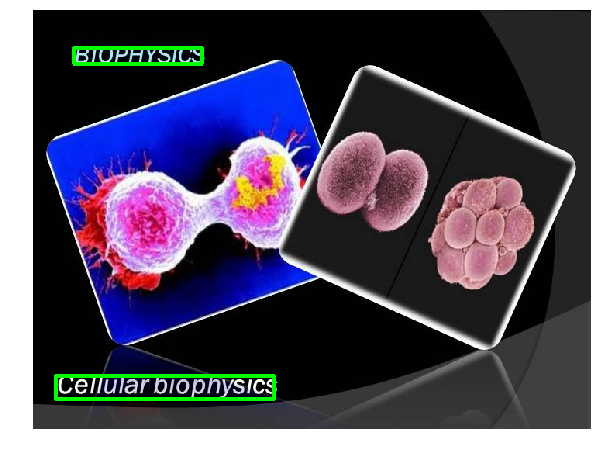

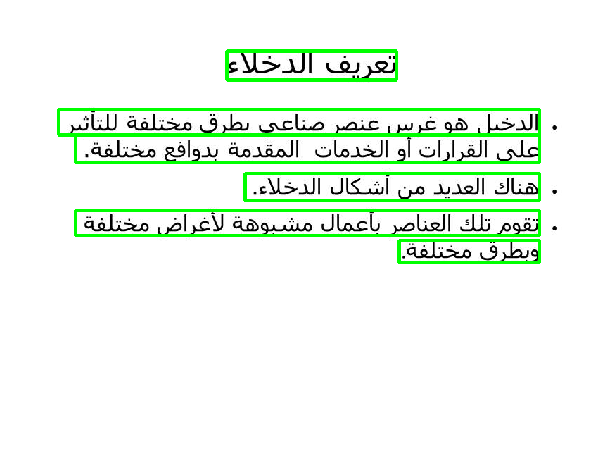

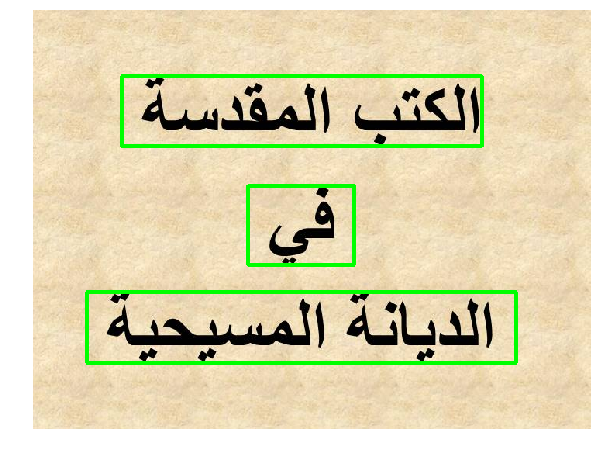

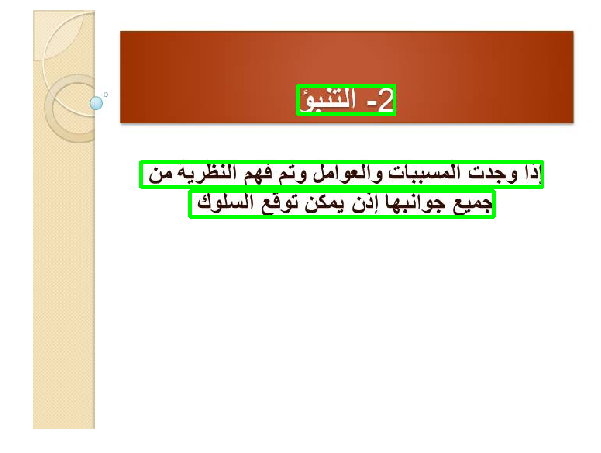

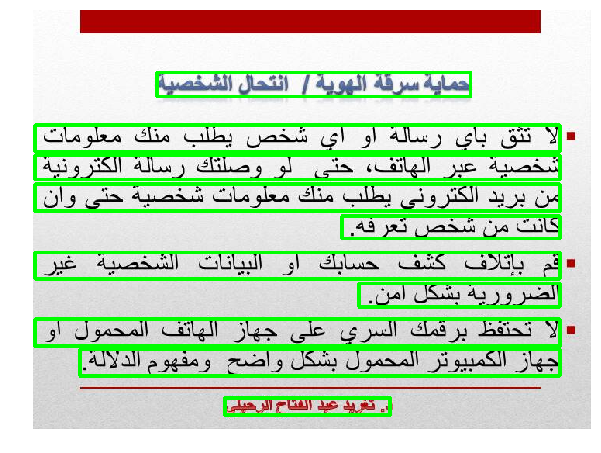

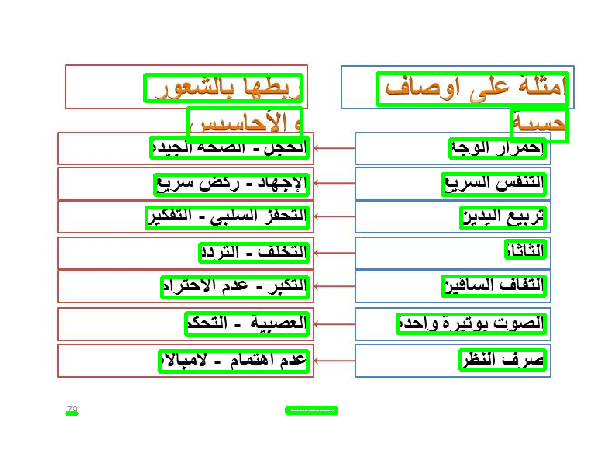

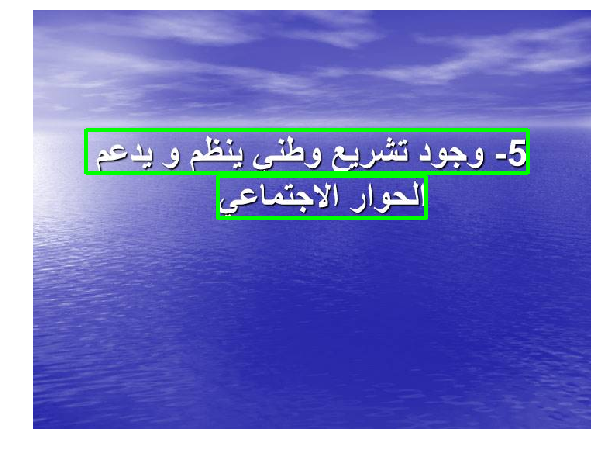

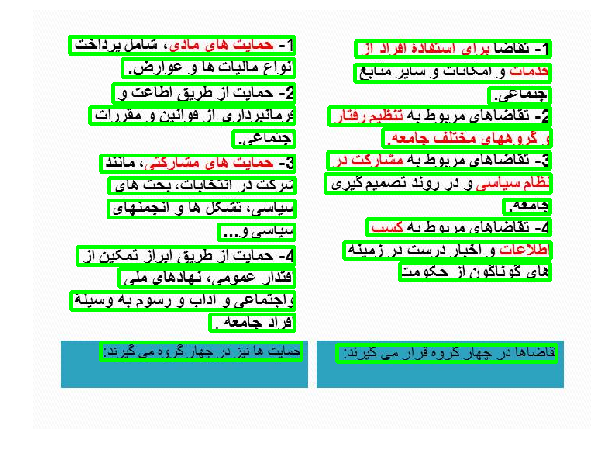

In [3]:
nb_random_samples = 8
for k in range(nb_random_samples) :
    random_json_file, sample_idx = engine.get_one_json()
    engine.visualize_one_raw_json( random_json_file )

# Visualize ISI-PPT Text Detection Targets with Border Supports

Instead of using the classic binary *text/non-text* annotation, ISI-PPT provides a new target with border supports, namely a three-class *text/border/non-text* annotation. 

`ISIPPT.get_one_sample( sample_idx )` will produce a pair of images `(X, Y)`, where 
- `X` is the original image array
    - shape = `( image_height, image_width, 3 )`
    - dtype = `uint8`
    - range = `(0, 255)`
- `Y` is the three class color-coded text-detection target
    - shape = `( image_height, image_width, 3 )`
    - dtype = `float32`
    - range = `(0, 1)`
    - color code = `{R: non-text, G: border, B: text}`

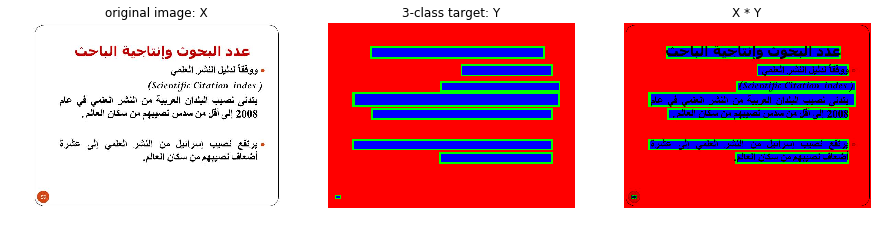

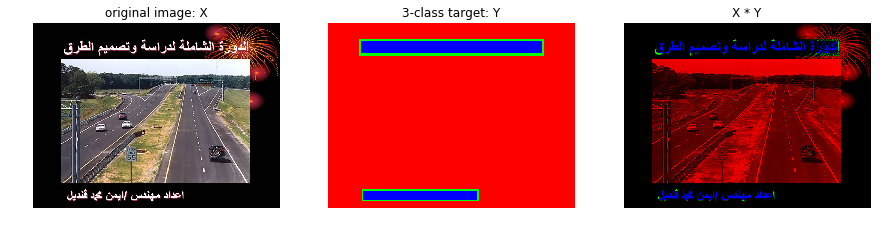

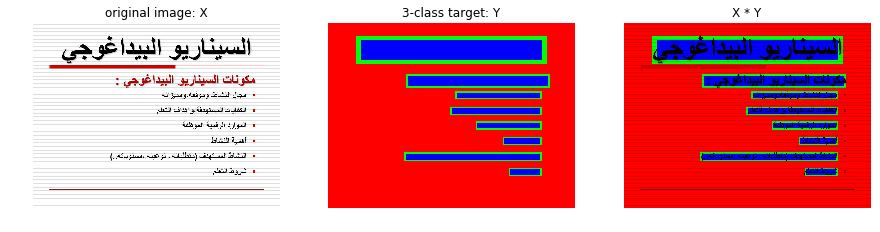

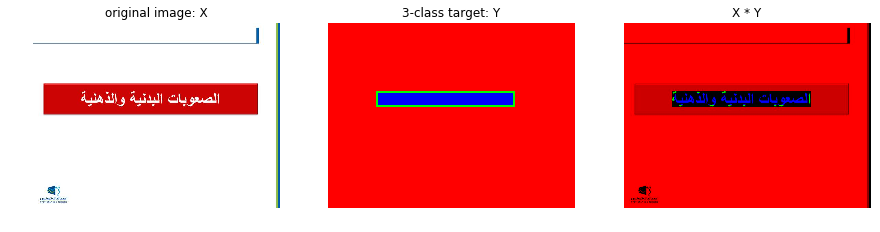

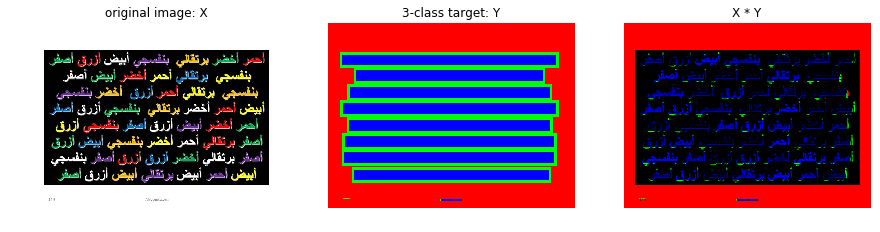

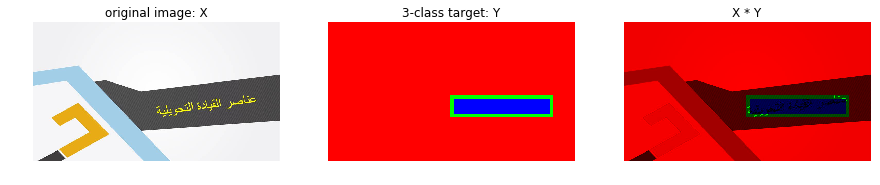

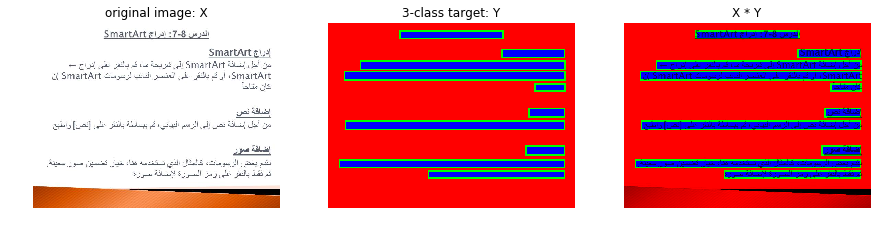

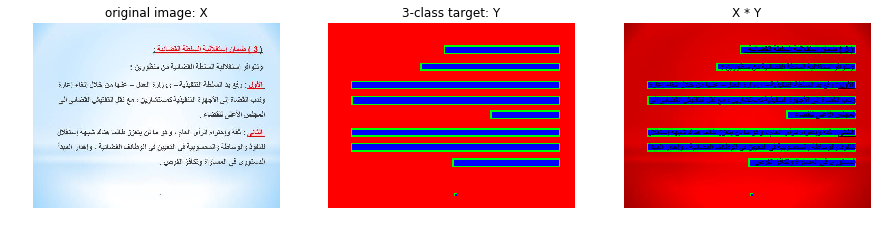

In [4]:
for k in range(nb_random_samples) :
    random_json_file, sample_idx = engine.get_one_json()
    image, target = engine.get_one_sample( sample_idx = sample_idx )
    engine.visualize_image_and_target( image, target )

# Visualize ISI-PPT Line Samples and Transcriptions

ISI-PPT Dataset is design not only for the text detection task, but also the OCR task. It is simple to extract text lines and corresponding line transcriptions as well. An example is given below to:
1. extract all text lines and transcriptions, one line per image `$line_images`, one line per transcription `$line_trans`
2. language category, this is automatically tagged via Python Unicode `unicodedata` lib's `category`
3. line height distribution

NOTE: keep in mind that the reading order of ARABIC is **RIGHT to LEFT** instead of **LEFT to RIGHT**

In [5]:
line_images, line_trans = engine.get_line_OCR_samples( sample_idx = 9892 )
lang = engine.get_trans_language( sample_idx = sample_idx )
print "INFO: dominant language of this slide =", lang

INFO: dominant language of this slide = ARABIC


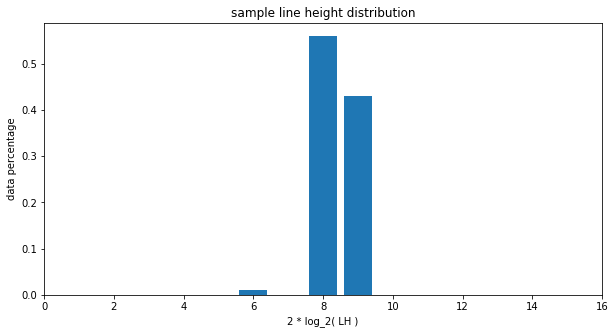

In [7]:
lh_dist = engine.get_line_height_distribution( sample_idx = sample_idx )
engine.visualize_line_height_distribution( lh_dist )

In [8]:
for idx, trans in enumerate( line_trans ) :
    print "Line", idx, ":", trans 

Line 0 : أجهزة المدخلات والمخرجات
Line 1 : تعتبر أجهزة الكمبيوتر قليلة الفائدة بالنسبة لنا اذا لم نستطع التواصل 
Line 2 : معها. ولتشغيل جهاز كمبيوتر ما، يجب ان يكون المستخدم قادرا 
Line 3 : على ادخال البيانات والاوامر وعلاوة على ذلك رؤية وسماع النتائج 
Line 4 : التي ينتجها جهاز الكمبيوتر. 
Line 5 : وتسمى الأجهزة المستخدمة لتغذية المعلومات في الكمبيوتر أجهزة 
Line 6 : المدخلات. وعلى الجانب الآخر، تسمى الاجهزة التي يستخدمها 
Line 7 : الكمبيوتر لعرض المعلومات للمستخدم أجهزة المخرجات. 


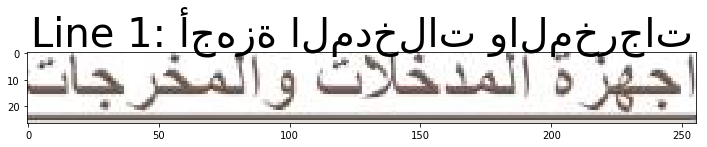

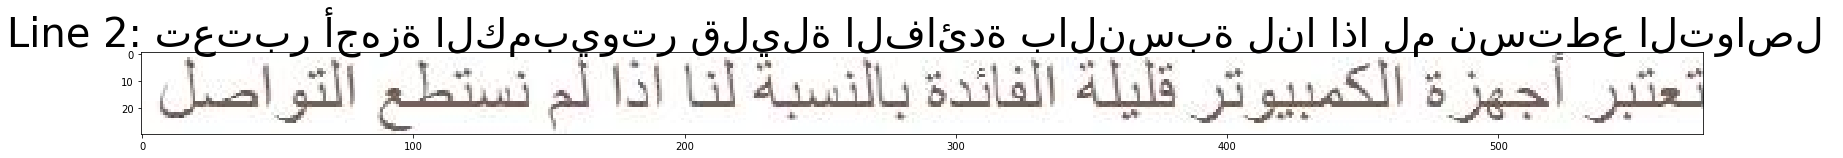

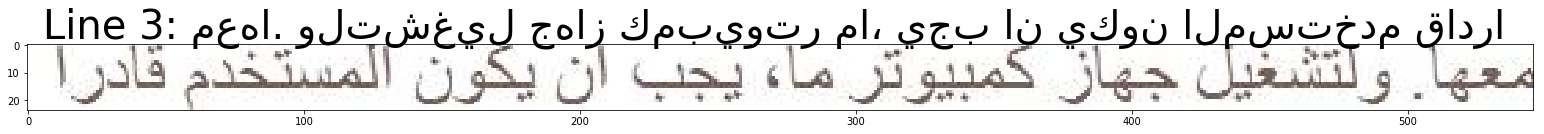

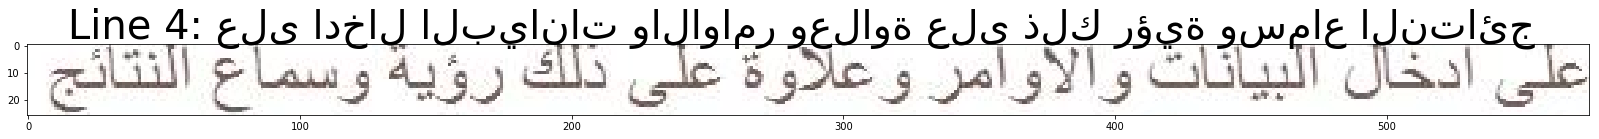

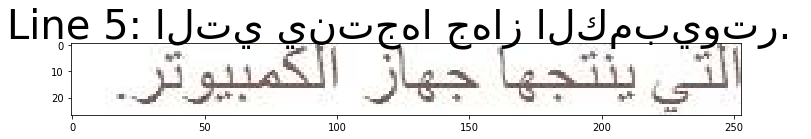

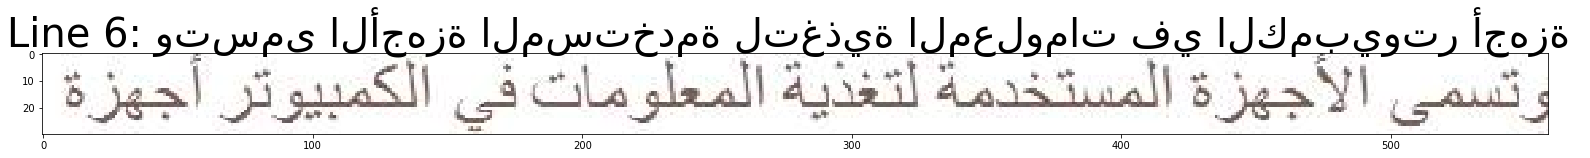

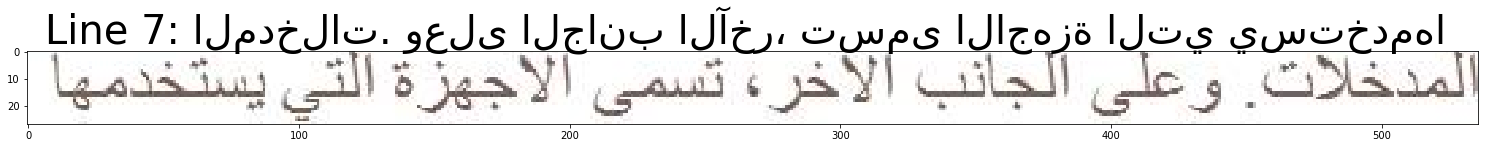

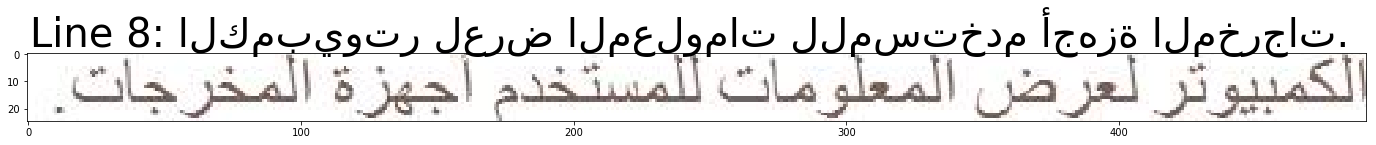

In [9]:
engine.visualize_line_samples( line_images, line_trans )

# Save Targets to Disk

Although the provided API could generate the text-line detection target online, one can also save such targets to disk if necessary. To do so, simply call `ISIPPT.save_target_to_disk( sample_idx, output_dir )` function. 

For example, the snipnet below will create a target directy and dump the first 10 samples' target in terms of `uint8` image. 

NOTE: the output target image is encoded by using `{ R: non-text, G: border, B: text }`.

In [10]:
target_dir = os.path.join( isi_ppt_data_root, os.path.pardir, 'target' )
os.system( 'mkdir -p %s' % target_dir )
for k in range( 10 ) :
    status, output_file = engine.save_target_to_disk( sample_idx = k, output_dir = target_dir )
    if ( status ) :
        print "Successfully save target to", output_file
    else :
        print "Fail to save target to", output_file

Successfully save target to ../data/../target/b64f6c5aae736cc890bdcf490a90ce94.png
Successfully save target to ../data/../target/e13d2d566fdc5792104bad127fe9e239.png
Successfully save target to ../data/../target/55c0dd737b9379a679f7b6ddde15dbbf.png
Successfully save target to ../data/../target/387b15fd77cb75d0232c06a02442fe4f.png
Successfully save target to ../data/../target/86f015fc9229733669db3dd4b62f494b.png
Successfully save target to ../data/../target/77a7d68bf92dc57bcd795c58ba6a4368.png
Successfully save target to ../data/../target/2990b9f607e8725c5ee4f8a02e1fb4c7.png
Successfully save target to ../data/../target/fa5394143dd60b65fd121efa9d6e6091.png
Successfully save target to ../data/../target/43353c77c6ed02878179f75cbabeff94.png
Successfully save target to ../data/../target/702bcd3885498d280b48d4fbbdf00051.png
